In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

data = pd.read_csv("t3.3.csv", sep=" ")
data = np.array(data)
# data = data.transpose()
data

array([[ 9.  , 12.1 , 48.2 ],
       [ 9.5 , 12.9 , 48.9 ],
       [10.  , 16.8 , 49.54],
       [10.6 , 14.8 , 50.25],
       [12.4 , 16.4 , 51.02],
       [16.2 , 20.9 , 51.84],
       [17.7 , 24.2 , 52.76],
       [20.1 , 28.1 , 56.39],
       [21.8 , 30.1 , 54.55],
       [25.3 , 35.8 , 55.35],
       [31.3 , 48.5 , 56.16],
       [36.  , 54.8 , 56.98]])

In [22]:
# 导入所需的库
import numpy as np
import statsmodels.api as sm

X = sm.add_constant(data[:,1:])
y = data[:, 0]
model = sm.OLS(y, X)
results = model.fit()
print("Model coefficients:", results.params)
print("Intercept:", results.params[0])
print("ANOVA table:")
print(results.summary())


Model coefficients: [-20.60348254   0.54082142   0.46929569]
Intercept: -20.60348254361689
ANOVA table:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     559.0
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           3.63e-10
Time:                        17:30:21   Log-Likelihood:                -13.806
No. Observations:                  12   AIC:                             33.61
Df Residuals:                       9   BIC:                             35.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

G:\github_project\github_me\regression_analysis_project\python_env\lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  k, _ = kurtosistest(a, axis)


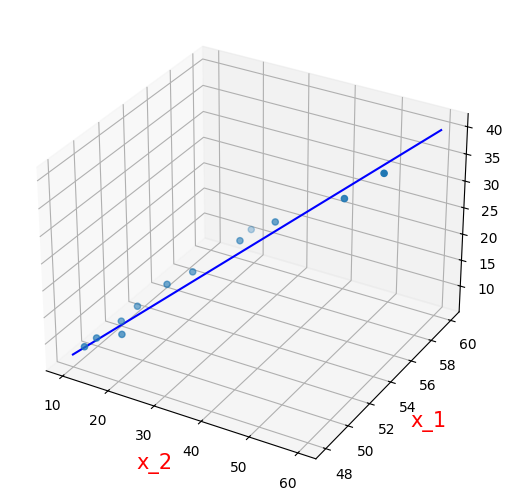

In [32]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False
# 创建窗口
fig=plt.figure()
# 在该窗口中创建3d绘图对象
ax=Axes3D(fig)
fig.add_axes(ax)
ax.scatter(data[:,1], data[:,2], data[:,0])

x_1= [10, 60]
x_2 = [48, 60]
y = [results.params[0] + results.params[1] * 10 + results.params[2] * 48,
     results.params[0] + results.params[1] * 60 + results.params[2] * 60]

ax.plot(x_1, x_2, y, color='blue', linestyle='-')

# 添加坐标轴(顺序是Z, Y, X)
ax.set_zlabel('Y', fontdict={'size': 15, 'color': 'red'})
ax.set_ylabel('x_1', fontdict={'size': 15, 'color': 'red'})
ax.set_xlabel('x_2', fontdict={'size': 15, 'color': 'red'})

plt.show()


In [24]:
predictions = results.predict([[1, 67, 58]])
prediction = results.get_prediction([[1, 67, 58]])
print("Predictions:", predictions)
print("Prediction Interval:\n", prediction.summary_frame(alpha=0.05))

Predictions: [42.85070209]
Prediction Interval:
         mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  42.850702  0.977792      40.638782      45.062622     39.870574   

   obs_ci_upper  
0      45.83083  
